<a href="https://colab.research.google.com/github/RaianaSeixas/Python-/blob/main/Python_for_Finance/Analyzing_a_Portfolio_Brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import yfinance as yf
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = [15, 6] # mudar área dos gráficos
import statsmodels.api as sm

In [19]:
# Potfolio Definition

'''
 Let's create our portfolio
'''
stocks = ['ITUB4.SA', 'SUZB3.SA', 'PRIO3.SA', 'PETR4.SA', 'RADL3.SA']
weights = [0.20, 0.20, 0.25, 0.15, 0.20] # proportion of each stock in the portifolio
years=2 # period of analysis

today= datetime.date(datetime.now()) #today
start= today - timedelta(days =years*364)  # today - n * years
end=today 

data = yf.download(stocks, start=start, end=end) # web scraping from Yahoo Finance

[*********************100%***********************]  5 of 5 completed


In [20]:
'''
Daily returns

To get the daily portfolio returns, we multiplied the daily returns by the weights and calculated the sum of the results.
'''
x = data['Close'].pct_change()

#portfolio return
ret = (x * weights).sum(axis = 1)

#total cumulative returns for our portfolio
cumulative = (ret + 1).cumprod() 

print(cumulative)

Date
2020-06-08    1.000000
2020-06-09    0.974188
2020-06-10    0.948379
2020-06-12    0.912749
2020-06-15    0.936938
                ...   
2022-05-30    1.714814
2022-05-31    1.717977
2022-06-01    1.723022
2022-06-02    1.731340
2022-06-03    1.714973
Length: 494, dtype: float64


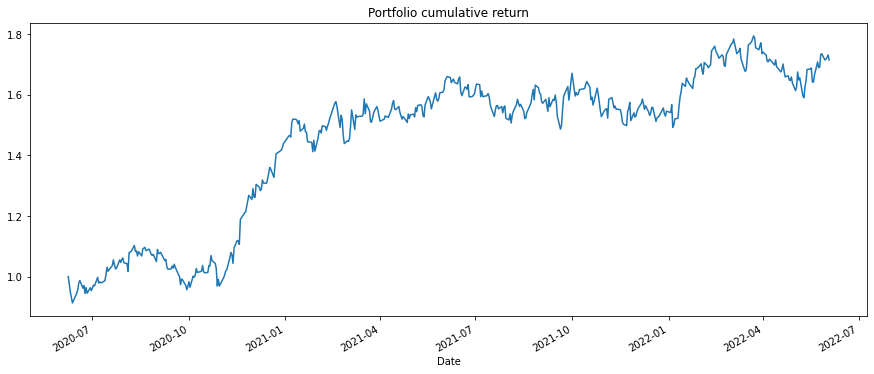

In [21]:
'''
Plotting the cumulative returns will give us a better understanding of the data:
'''
cumulative.plot()
plt.title('Portfolio cumulative return')

plt.savefig('plot.png')

In [22]:
# Risk % of portfolio.

print('Daily volatility=',np.std(ret)) # daily volatility = standard deviation of the portfolio return

# We can calculate the annual volatility by taking the square root of the number of trading days in a year (252) and multiply it by the daily volatility

annual_std = np.std(ret) * np.sqrt(252) 
print('Annual volatility=',annual_std)

Daily volatility= 0.016326164506231946
Annual volatility= 0.25916982688211615


In [23]:
'''
Sharpe ratio is the measure of the risk-adjusted return of a portfolio. 
A portfolio with a higher Sharpe ratio is considered better.

To calculate the Sharpe ratio, we need to take the average return and divide it by the volatility.
'''

sharpe = (np.mean(ret) / np.std(ret))*np.sqrt(252) #We multiplied the result by the square root of 252 to annualize the Sharpe ratio. (There are 252 trading days in a year)

print('Annual Sharpe ratio=',sharpe)

Annual Sharpe ratio= 1.1916091948332077


          ITUB4.SA  PETR4.SA  PRIO3.SA  RADL3.SA  SUZB3.SA
ITUB4.SA  1.000000  0.473181  0.220101  0.264947  0.065630
PETR4.SA  0.473181  1.000000  0.313926  0.186313  0.052688
PRIO3.SA  0.220101  0.313926  1.000000  0.085091  0.158045
RADL3.SA  0.264947  0.186313  0.085091  1.000000  0.099845
SUZB3.SA  0.065630  0.052688  0.158045  0.099845  1.000000


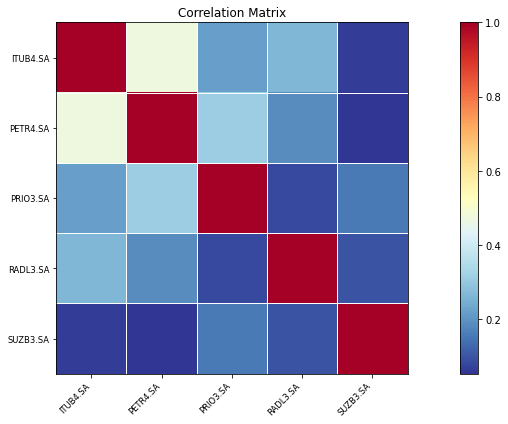

In [24]:
'''
Correlation

In finance, correlation is a statistic that measures the degree to which two securities move in relation to each other. The corr() function results in a matrix that includes values for each stock pair. The values are in the range of -1 to 1. A positive correlation means that the stocks have returns that are positively correlated and move in the same direction. +1 means that the returns are perfectly correlated.
Finding stocks that have low correlation helps to diversify an investment portfolio and minimize risk.'''

x = data['Close'].pct_change()
corr = x.corr()
print(corr) 

# Graph
sm.graphics.plot_corr(corr, xnames=list(x.columns))
plt.savefig('plot.png')